## Implementing LeNet

Yann le Cun proposed a family of **ConvNets** named **LeNet** trained for recoginizing MNIST handwritten characters with robustness to simple geometric transformations and to distortion. 

For more details: [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf)

The key intuition here is to have low-layers alternating convolution operations with max-pooling operations. The Convolution operations are based on carefully chosen local receptive fields with shared weights for multiple feature maps. Then higher levels are fully connected layers based on a traditional MLP with hidden layers and softmax as the output layer.

So the structure of LeNet is as following: 

Input -> CONV -> ReLU -> POOL -> CONV -> ReLU -> POOL -> FC -> Softmax -> output

![image](https://blog.dataiku.com/hs-fs/hubfs/Dataiku%20Dec%202016/Image/le_net.png?t=1513695546980&width=620&name=le_net.png)

In [2]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

#define the convnet 
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL 
        # 20 filters, each size 5 x 5
        model.add(Conv2D(20, kernel_size=5, padding="same",
            input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [ ]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

history = model.fit(X_train, y_train, 
        batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 404s - loss: 0.1834 - acc: 0.9443 - val_loss: 0.0632 - val_acc: 0.9807
Epoch 2/20
48000/48000 [==============================] - 408s - loss: 0.0516 - acc: 0.9841 - val_loss: 0.0434 - val_acc: 0.9867
Epoch 3/20
48000/48000 [==============================] - 410s - loss: 0.0337 - acc: 0.9899 - val_loss: 0.0390 - val_acc: 0.9881
Epoch 4/20
48000/48000 [==============================] - 430s - loss: 0.0233 - acc: 0.9926 - val_loss: 0.0421 - val_acc: 0.9875
Epoch 5/20
48000/48000 [==============================] - 445s - loss: 0.0174 - acc: 0.9940 - val_loss: 0.0363 - val_acc: 0.9894
Epoch 6/20
48000/48000 [==============================] - 449s - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0399 - val_acc: 0.9880
Epoch 7/20
48000/48000 [==============================] - 446s - loss: 0.0103 - acc: 0.9965 - val_loss: 0.0338 - val_acc: 0.9906
Epoch 8/

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


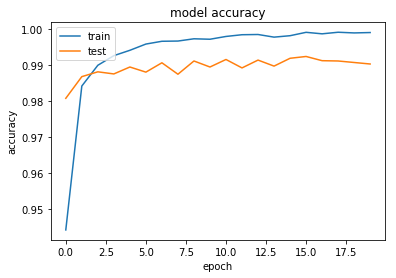

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


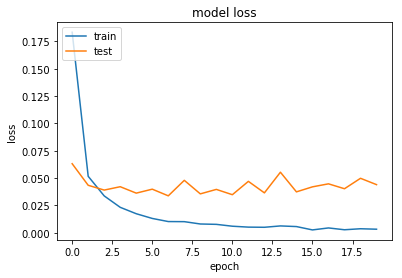

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()